# This notebook loads the daily rainfall in the UK in Feb 2020 using ERA5 data

#### Using Iris for NetCDF data load and processing

### Data acquired from https://cds.climate.copernicus.eu/cdsapp#!/software/app-c3s-daily-era5-statistics?tab=overview

### For Met Office Climate Data Challenge 2022 Team 3A - Providing Historical Context to Extreme Events in Real-time


##### Correspondence: Timothy Lam t.lam@exeter.ac.uk

#### Imports

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os

import iris

import iris.quickplot as qplt
import iris.coord_categorisation as coord_cat


#### Check variables of the NetCDF file

In [4]:
precip = iris.load('2020_Feb_UK_daily_rainfall_mean.nc')
print (precip[0])

precipitation_flux / (kg m-2 s-1)   (time: 29; latitude: 41; longitude: 49)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Scalar coordinates:
          realization: 0
     Attributes:
          Conventions: CF-1.7
          comment: includes both liquid and solid phases
          history: 2022-05-04T12:25 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-2.24.0 with...
          institution: European Centre for Medium-Range Weather Forecasts
          source: ECMWF
          type: real


#### Load monthly precipitation data into an Iris cube

In [5]:
precip_path = '2020_Feb_UK_daily_rainfall_mean.nc'
precip = iris.load_cube(precip_path, 'precipitation_flux')
precip.coord('latitude').guess_bounds()
precip.coord('longitude').guess_bounds()


#### Plot data on 8 Feb 2020

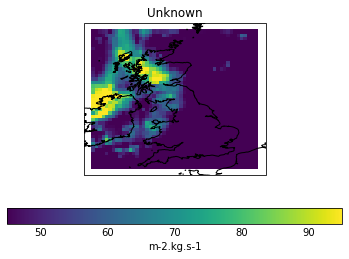

In [10]:
qplt.pcolormesh(precip[7]*86400, vmin = 45, vmax = 95) 
plt.gca().coastlines()

#### Plot data on 9 Feb 2020

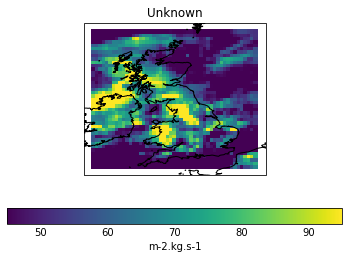

In [11]:
qplt.pcolormesh(precip[8]*86400, vmin = 45, vmax = 95) 
plt.gca().coastlines()

#### Plot data on 10 Feb 2020

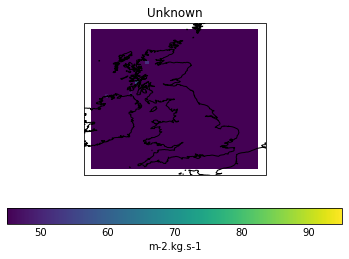

In [12]:
qplt.pcolormesh(precip[9]*86400, vmin = 45, vmax = 95) 
plt.gca().coastlines()

#### Plot data on 11 Feb 2020

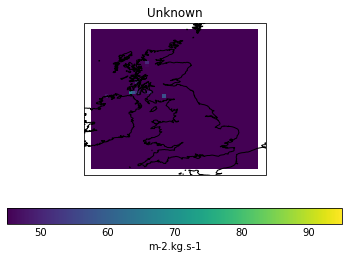

In [13]:
qplt.pcolormesh(precip[10]*86400, vmin = 45, vmax = 95) 
plt.gca().coastlines()

#### Plot data on 12 Feb 2020

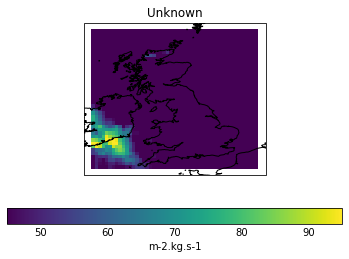

In [14]:
qplt.pcolormesh(precip[11]*86400, vmin = 45, vmax = 95) 
plt.gca().coastlines()

#### Plot data on 13 Feb 2020

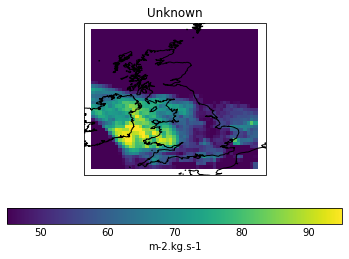

In [15]:
qplt.pcolormesh(precip[12]*86400, vmin = 45, vmax = 95) 
plt.gca().coastlines()

#### Plot data on 14 Feb 2020

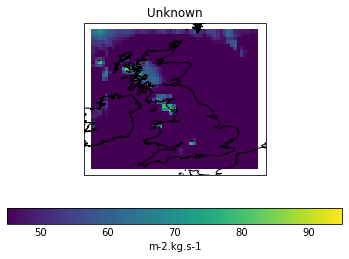

In [16]:
qplt.pcolormesh(precip[13]*86400, vmin = 45, vmax = 95) 
plt.gca().coastlines()

#### Plot data on 15 Feb 2020

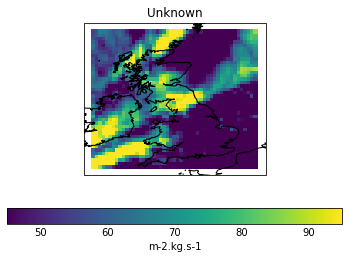

In [17]:
qplt.pcolormesh(precip[14]*86400, vmin = 45, vmax = 95) 
plt.gca().coastlines()

#### Plot data on 16 Feb 2020

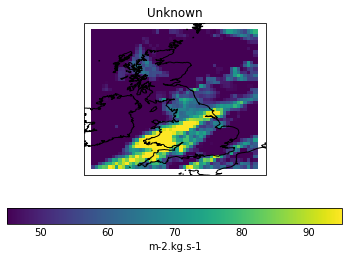

In [18]:
qplt.pcolormesh(precip[15]*86400, vmin = 45, vmax = 95) 
plt.gca().coastlines()

#### Plot data on 17 Feb 2020

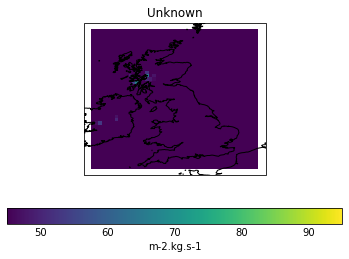

In [19]:
qplt.pcolormesh(precip[16]*86400, vmin = 45, vmax = 95) 
plt.gca().coastlines()

#### Load return period data and extract the UK

In [23]:
return_period_path = 'Return_periods_ERA5/precipitation-at-fixed-return-period_europe_ecad_30-year_5-yrs_1989-2018_v1.nc' # 5 years
return_period = iris.load_cube(return_period_path, 'precipitation_5-return-period')
return_period.coord('latitude').guess_bounds()
return_period.coord('longitude').guess_bounds()

UK_lat = iris.Constraint(latitude=lambda v: v > 50 and v <= 60 )
UK_lon = iris.Constraint(longitude=lambda v: v > -9 and v <= 3 )

return_period_UK =  return_period.extract(UK_lat & UK_lon) 

return_period_path = 'Return_periods_ERA5/precipitation-at-fixed-return-period_europe_ecad_30-year_10-yrs_1989-2018_v1.nc'
return_period_10y = iris.load_cube(return_period_path, 'precipitation_10-return-period')
return_period_10y.coord('latitude').guess_bounds()
return_period_10y.coord('longitude').guess_bounds()

return_period_10y_UK =  return_period_10y.extract(UK_lat & UK_lon) 

return_period_path = 'Return_periods_ERA5/precipitation-at-fixed-return-period_europe_ecad_30-year_25-yrs_1989-2018_v1.nc'
return_period_25y = iris.load_cube(return_period_path, 'precipitation_25-return-period')
return_period_25y.coord('latitude').guess_bounds()
return_period_25y.coord('longitude').guess_bounds()

return_period_25y_UK =  return_period_25y.extract(UK_lat & UK_lon) 

return_period_path = 'Return_periods_ERA5/precipitation-at-fixed-return-period_europe_ecad_30-year_50-yrs_1989-2018_v1.nc'
return_period_50y = iris.load_cube(return_period_path, 'precipitation_50-return-period')
return_period_50y.coord('latitude').guess_bounds()
return_period_50y.coord('longitude').guess_bounds()

return_period_50y_UK =  return_period_50y.extract(UK_lat & UK_lon) 

return_period_path = 'Return_periods_ERA5/precipitation-at-fixed-return-period_europe_ecad_30-year_100-yrs_1989-2018_v1.nc'
return_period_100y = iris.load_cube(return_period_path, 'precipitation_100-return-period')
return_period_100y.coord('latitude').guess_bounds()
return_period_100y.coord('longitude').guess_bounds()

return_period_100y_UK =  return_period_100y.extract(UK_lat & UK_lon) 

#### Regrid the precipitation grid to match return period grid

In [28]:
precip = precip.regrid(return_period_UK, iris.analysis.Linear())
print (precip[0])

precipitation_flux / (kg m-2 s-1)   (latitude: 100; longitude: 120)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          realization: 0
          time: 2020-02-01 00:00:00
     Attributes:
          Conventions: CF-1.7
          comment: includes both liquid and solid phases
          history: 2022-05-04T12:25 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-2.24.0 with...
          institution: European Centre for Medium-Range Weather Forecasts
          source: ECMWF
          type: real


#### Plot to check whether rainfall exceeds different return periods

##### 8 Feb

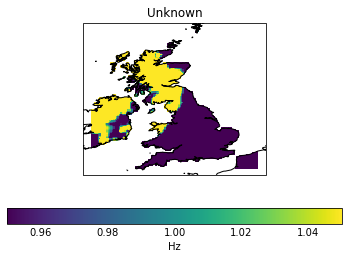

In [31]:
# 5-year
qplt.pcolormesh(precip[7]*86400 / return_period_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

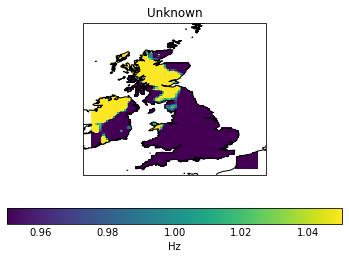

In [32]:
# 10-year
qplt.pcolormesh(precip[7]*86400 / return_period_10y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

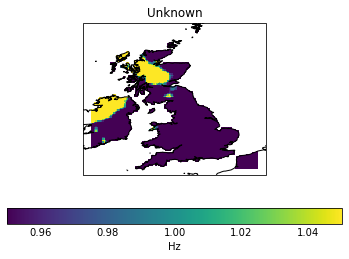

In [33]:
# 25-year
qplt.pcolormesh(precip[7]*86400 / return_period_25y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

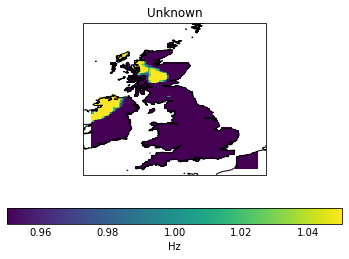

In [34]:
# 50-year
qplt.pcolormesh(precip[7]*86400 / return_period_50y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

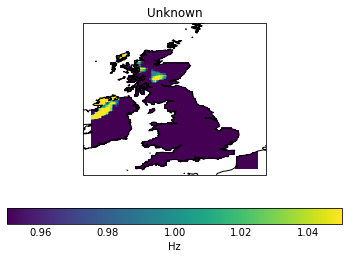

In [35]:
# 100-year
qplt.pcolormesh(precip[7]*86400 / return_period_100y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

##### 9 Feb

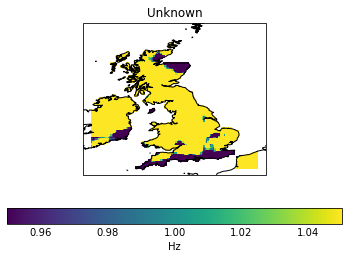

In [37]:
# 5-year
qplt.pcolormesh(precip[8]*86400 / return_period_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

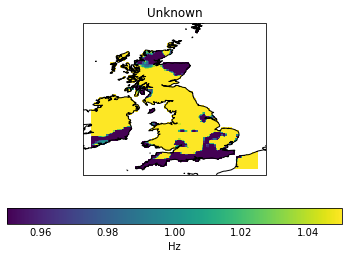

In [38]:
# 10-year
qplt.pcolormesh(precip[8]*86400 / return_period_10y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

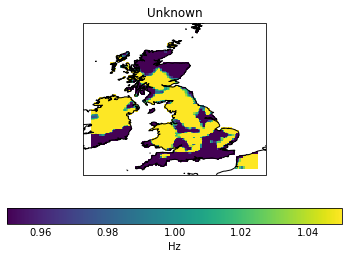

In [39]:
# 25-year
qplt.pcolormesh(precip[8]*86400 / return_period_25y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

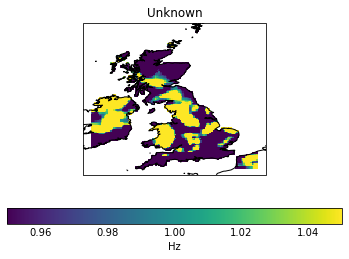

In [40]:
# 50-year
qplt.pcolormesh(precip[8]*86400 / return_period_50y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

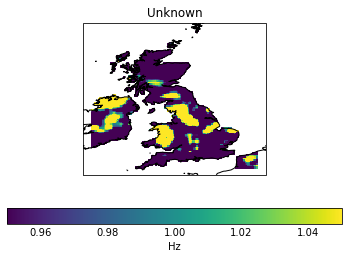

In [42]:
# 100-year
qplt.pcolormesh(precip[8]*86400 / return_period_100y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

##### 12 Feb

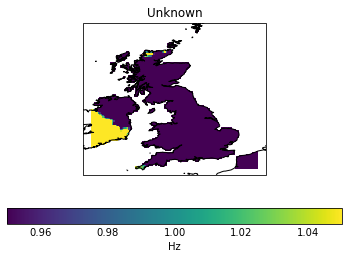

In [43]:
# 5-year
qplt.pcolormesh(precip[11]*86400 / return_period_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

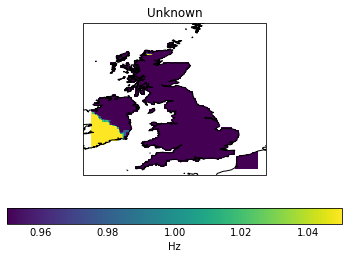

In [44]:
# 10-year
qplt.pcolormesh(precip[11]*86400 / return_period_10y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

##### 13 Feb

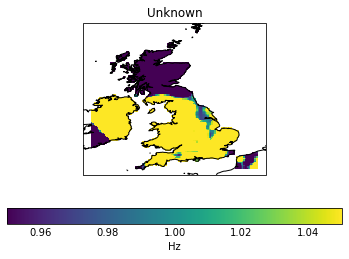

In [45]:
# 5-year
qplt.pcolormesh(precip[12]*86400 / return_period_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

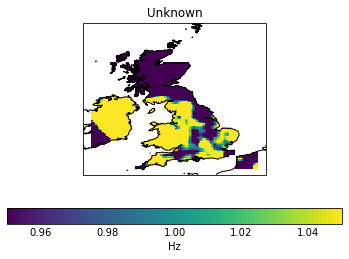

In [46]:
# 10-year
qplt.pcolormesh(precip[12]*86400 / return_period_10y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

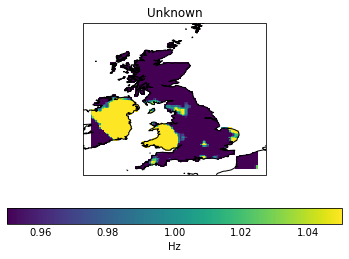

In [47]:
# 25-year
qplt.pcolormesh(precip[12]*86400 / return_period_25y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

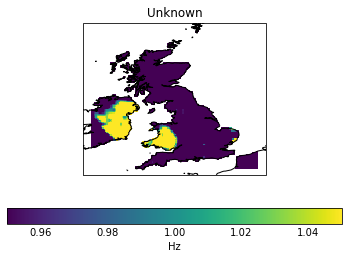

In [48]:
# 50-year
qplt.pcolormesh(precip[12]*86400 / return_period_50y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

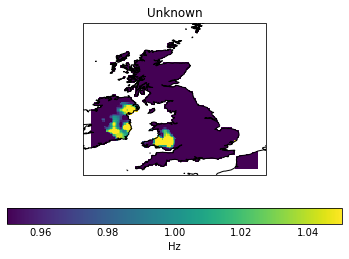

In [49]:
# 100-year
qplt.pcolormesh(precip[12]*86400 / return_period_100y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

##### 14 Feb

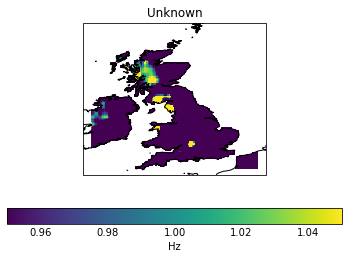

In [50]:
# 5-year
qplt.pcolormesh(precip[13]*86400 / return_period_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

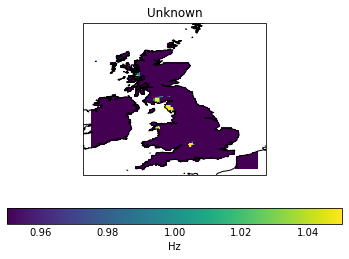

In [51]:
# 10-year
qplt.pcolormesh(precip[13]*86400 / return_period_10y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

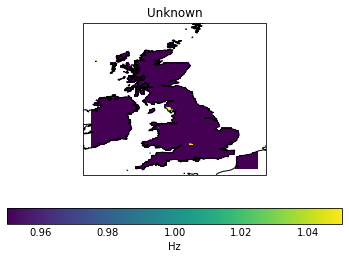

In [52]:
# 25-year
qplt.pcolormesh(precip[13]*86400 / return_period_25y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

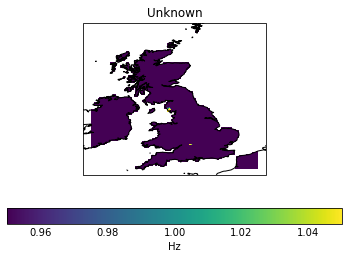

In [53]:
# 50-year
qplt.pcolormesh(precip[13]*86400 / return_period_50y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

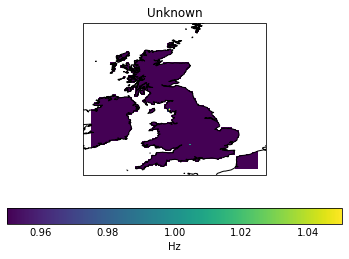

In [54]:
# 100-year
qplt.pcolormesh(precip[13]*86400 / return_period_100y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

##### 15 Feb

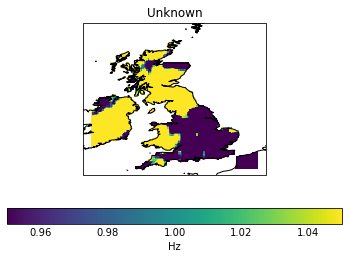

In [55]:
# 5-year
qplt.pcolormesh(precip[14]*86400 / return_period_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

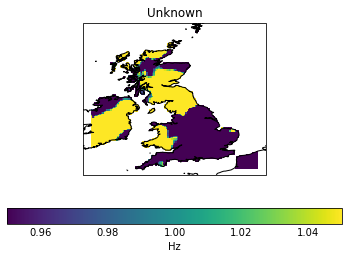

In [56]:
# 10-year
qplt.pcolormesh(precip[14]*86400 / return_period_10y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

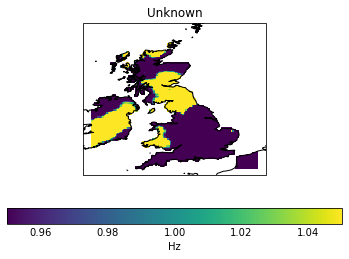

In [57]:
# 25 year
qplt.pcolormesh(precip[14]*86400 / return_period_25y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

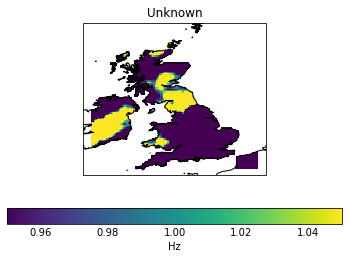

In [58]:
# 50 year 
qplt.pcolormesh(precip[14]*86400 / return_period_50y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

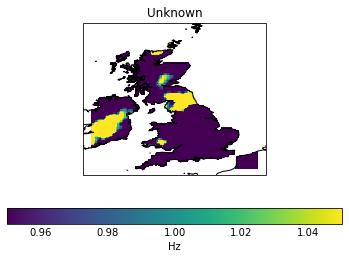

In [59]:
# 100 year
qplt.pcolormesh(precip[14]*86400 / return_period_100y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

##### 16 Feb

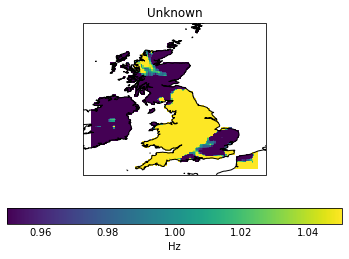

In [60]:
# 5 year
qplt.pcolormesh(precip[15]*86400 / return_period_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

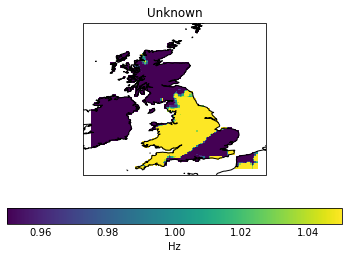

In [61]:
# 10 year
qplt.pcolormesh(precip[15]*86400 / return_period_10y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

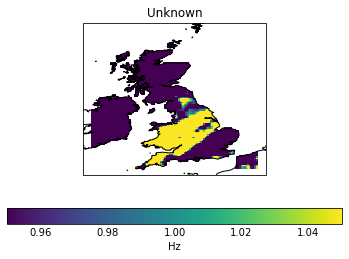

In [62]:
# 25 year
qplt.pcolormesh(precip[15]*86400 / return_period_25y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

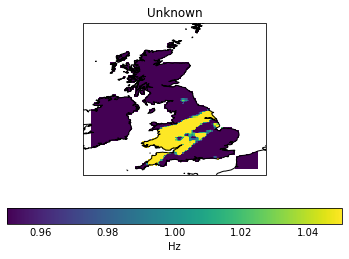

In [63]:
# 50 year
qplt.pcolormesh(precip[15]*86400 / return_period_50y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()

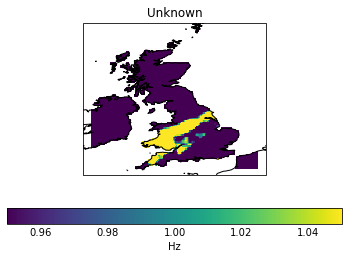

In [64]:
# 100 year
qplt.pcolormesh(precip[15]*86400 / return_period_100y_UK, vmin = 0.95, vmax = 1.05) 
plt.gca().coastlines()